# Pyber Ride Sharing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
city_df = pd.read_csv("./raw_data/city_data.csv")
ride_df = pd.read_csv("./raw_data/ride_data.csv")

In [3]:
#city_df.head(2)
len(city_df)

120

In [4]:
ride_df.head(2)

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577


In [5]:
ride_df['ride_id'].nunique()

2375

In [6]:
#merge 2 df on city
city_rides_merged_df = pd.merge(ride_df, city_df, on='city', sort=True)

In [7]:
city_rides_merged_df['ride_id'].nunique()

2375

In [8]:
city_rides_merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Amandaburgh,2018-03-05 02:15:38,26.28,906850928986,12,Urban
1,Amandaburgh,2018-02-24 23:10:49,43.66,6573820412437,12,Urban
2,Amandaburgh,2018-02-10 20:42:46,36.17,6455620849753,12,Urban
3,Amandaburgh,2018-01-11 02:22:07,29.24,7279902884763,12,Urban
4,Amandaburgh,2018-01-21 04:12:54,9.26,5528427024492,12,Urban


In [9]:
city_rides_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
city            2375 non-null object
date            2375 non-null object
fare            2375 non-null float64
ride_id         2375 non-null int64
driver_count    2375 non-null int64
type            2375 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [10]:
city_rides_merged_df.columns

Index(['city', 'date', 'fare', 'ride_id', 'driver_count', 'type'], dtype='object')

In [11]:
city_rides_gb = city_rides_merged_df.groupby('city')

In [12]:
#Average Fare ($) Per City
avFarebyCity = city_rides_gb['fare'].mean()
#Total Number of Rides Per City
numRidesPerCity = city_rides_gb['ride_id'].count()
#Total Number of Drivers Per City
numDriversPerCity = city_rides_gb['driver_count'].max()
#City Type (Urban, Suburban, Rural)
cityTypes = city_rides_gb['type'].max()

In [49]:
fares_report_df = pd.DataFrame({'Average Fare ($) Per City':avFarebyCity,
             'Total Number of Rides Per City':numRidesPerCity,
             'Total Number of Drivers Per City':numDriversPerCity,
             'City Type (Urban, Suburban, Rural)':cityTypes})

In [50]:
fares_report_df.head()

,Average Fare ($) Per City,"City Type (Urban, Suburban, Rural)",Total Number of Drivers Per City,Total Number of Rides Per City
city,,,,
Amandaburgh,24.641667,Urban,12,18
Barajasview,25.332273,Urban,26,22
Barronchester,36.422500,Suburban,11,16
Bethanyland,32.956111,Suburban,22,18
Bradshawfurt,40.064000,Rural,7,10


In [13]:
#Urban city details
urbanCities = city_rides_merged_df[city_rides_merged_df['type']=='Urban']
urbanRideCount = urbanCities.groupby(["city"]).count()["ride_id"]
urbanAvgFare = urbanCities.groupby(["city"]).mean()["fare"]
urbanDriverCount = urbanCities.groupby(["city"]).mean()["driver_count"]

In [14]:
print(len(urbanRideCount))
print(len(urbanAvgFare))

66
66


In [15]:
#Rural city details
ruralCities = city_rides_merged_df[city_rides_merged_df['type']=='Rural']
ruralRideCount = ruralCities.groupby(["city"]).count()["ride_id"]
ruralAvgFare = ruralCities.groupby(["city"]).mean()["fare"]
ruralDriverCount = ruralCities.groupby(["city"]).mean()["driver_count"]

In [16]:
print(len(ruralRideCount))
print(len(ruralAvgFare))

18
18


In [17]:
#Suburban city details
suburbanCities = city_rides_merged_df[city_rides_merged_df['type']=='Suburban']
suburbanRideCount = suburbanCities.groupby(["city"]).count()["ride_id"]
suburbanAvgFare = suburbanCities.groupby(["city"]).mean()["fare"]
suburbanDriverCount = suburbanCities.groupby(["city"]).mean()["driver_count"]

In [18]:
print(len(suburbanRideCount))
print(len(suburbanAvgFare))

36
36


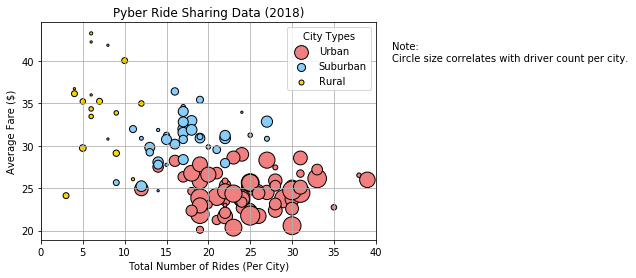

In [60]:
#Scatter Plot the Urban city details
plt.scatter(urbanRideCount, 
            urbanAvgFare, 
            s=5*urbanDriverCount, c="lightcoral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1, label="Urban")
#Scatter Plot the Suburban city details
plt.scatter(suburbanRideCount, 
            suburbanAvgFare, 
            s=5*suburbanDriverCount, c="lightskyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1, label="Suburban")
#Scatter Plot the Rural city details
plt.scatter(ruralRideCount, 
            ruralAvgFare, 
            s=5*ruralDriverCount, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=1, label="Rural")

plt.title('Pyber Ride Sharing Data (2018)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.xlim((0,40))
plt.grid(True)

plt.legend( loc="best", title="City Types")

# Incorporate a text label regarding circle size
plt.text(42, 40, "Note:\nCircle size correlates with driver count per city.")

plt.show()

In [68]:
#Calculations for pie chart
#% of Total Fares by City Type
perFaresByCityType = (city_rides_merged_df.groupby('type').sum()['fare'] / city_rides_merged_df['fare'].sum()) * 100

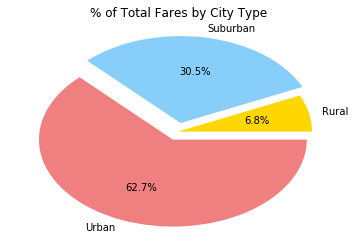

In [83]:
# Draw the Pie Chart
plt.pie(perFaresByCityType, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0.1, 0.1], 
        autopct='%1.1f%%')
plt.title("% of Total Fares by City Type")

# Show Figure
plt.show()

In [78]:
#% of Total Rides by City Type
perTotRidesByCityType = (city_rides_merged_df.groupby('type').count()['ride_id'] / city_rides_merged_df['ride_id'].count()) * 100

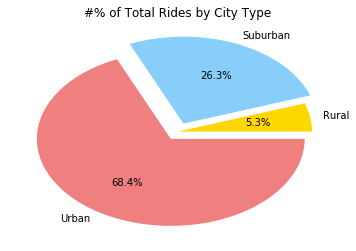

In [80]:
#Draw pie chart
plt.pie(perTotRidesByCityType, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0.1, 0.1], 
        autopct='%1.1f%%')
plt.title("#% of Total Rides by City Type")

# Show Figure
plt.show()

In [85]:
city_rides_merged_df.columns

Index(['city', 'date', 'fare', 'ride_id', 'driver_count', 'type'], dtype='object')

In [101]:
#% of Total Drivers by City Type
perTotDriversByCityType = (city_rides_merged_df.groupby('type').sum()['driver_count'] / city_rides_merged_df['driver_count'].sum()) * 100

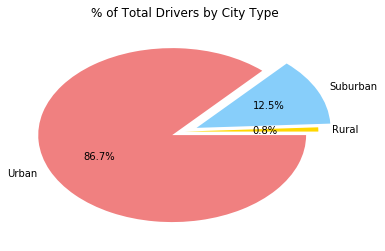

In [103]:
# Draw the Pie Chart
plt.pie(perTotDriversByCityType, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0.1, 0.1], 
        autopct='%1.1f%%')
plt.title("% of Total Drivers by City Type")

# Show Figure
plt.show()